# Gradient Descent in Regression

In this notebook we will look at [Linear](#first-bullet) and [Logistic](#second-bullet) Regression with respect to the Gradient Descent algorithm.
<br><br> To continue with this lesson, you should already:
* Have an understanding of coding in Python, such as objects and for loops.
* Be familiar with NumPy and arrays or Pandas dataframes.
* Have some knowledge of vectorization, matrices and the dot product.

<br> After this lesson you should aim to understand:
* The maths behind gradient descent so you can explain how it works.
* The type of problem each can algorithm can be used for.
* The type of Loss/Cost functions used to measure the error of predictions.

## Importing Libraries Required

In [3]:
import numpy as np                 # We will use this to create arrays and to perform vector/matrix multiplaction
import pandas as pd                # We will see how Pandas dataframes can be used in place of a NumPy array
import matplotlib.pyplot as plt    # The essential library that allows basic to advanced visualizations with Python
%matplotlib inline
import seaborn as sns              # A library built on top of matplotlib - this allows for faster and simpler visualizations, with more customization options
import warnings                    # We will have log errors due to calculating log(0) so we can ignore these to make easier reading
warnings.filterwarnings('ignore')  # (!) Will ignore instead of 'one warning' just for ease of reading

# Linear Regression with Multiple Variables <a class="anchor" id="first-bullet"></a>

The aim of the Linear Regression algorithm is to find the best fit for a line based on all the features, $x$, in a given dataset - allowing us to predict a **continuous** target variable, $y$. If we use an example where we wish to predict the sales price of a house based upon it's features (bedrooms, bathrooms, size etc.) $x_n$ will be these features, where $n$ is the number of features, and price will be our target variable, $y$.

<br>Our prediction, $\hat y$, will be then given by this equation:

#### $$\hat y =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ...\theta_n x_n $$

Where:
* **y** is the **target variable** (e.g. price of a house)
* $\hat y$ is our **predicted value** for y
* **x** is a **feature or variable** (such as: number of bedrooms, property size, waterfront view etc.)
* **n** is the **number of features** (number of columns in our dataframe minus the target column)
* **$\theta$** is the **coefficient** for that feature or **gradient** (a larger coefficient will have a larger effect on our target variable)

<br> And this is calculated by:
* Inputting the values for each variable, $x_n$.
* Providing each feature a coefficient, $\theta$, as above. (Normally these values are randomly initialised or at 0)
* Summing these values together to calculate $\hat y$

<br>However, we need to find which values of $\theta$ give the $\hat y$ closest to the true value of $y$ - in other words we are **minimizing the error in our prediction**.


### Linear Regression Cost Function
The cost function is essentially the difference between your predicted value for $y$ and the actual value for $y$. The most common method is to use the Mean Squared Error (MSE). Which is given by:

#### $$MSE =  (\hat y - y)^2 $$

Alternatively written as:

#### $$MSE =  (h_\theta(x) - y)^2 $$

The product is summed over each row in the data to provide a cost function, $J(\theta)$:
#### $$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)^2$$

Where:
* $h_\theta(x)$ or ($\hat y$) is the **predicted value**.
* **y** is the **target variable**
* **m** is the number of **training examples** (values or rows in the dataframe)
* **i** is the **row number** for that value of x or y (not a power)


Now for the machine learning bit!

### Gradient Descent
The gradient descent algorithm works by changing values of $\theta$, calculating $\hat y$, and then determines the error. It then adjusts the values for $\theta$ and repeats. Each cycle is known as an **iteration**.

Over each iteration we reduce the error and therefore the cost-function decreases. The idea is we **descend the gradient** of the cost function until we reach a minimum. 

The cost function as a function of just one variable or parameter, $\theta$. The cost function minimises (perfectly to zero in this case) for when $\theta=0$.

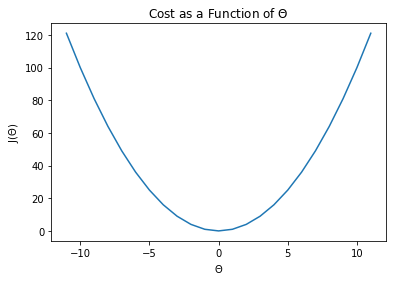

In [4]:
t = range(-11,12)
g = np.square(t)

ax = sns.lineplot(x=t, y=g)
ax.set(xlabel=r'${\Theta}$', ylabel=r'J(${\Theta}$)', title=r'Cost as a Function of ${\Theta}$');
#ax.get_figure().savefig("CostFunction.png")

### Simultaneous Update
This function will update each theta - the coefficient for each variable - based on the gradient descent algorithm.

The equation is given by:

#### $$ \theta_n = \theta_n - \alpha \frac{1}{m}\frac{dJ(\theta)}{d\theta_n} x_n$$

Where $\alpha$ is the **learning rate** or step-size.


The beauty of the maths is as it updates each value of $\theta$ it keeps the other values stationary, changing them **simultaneously**.

Below we will define two functions, the simultaneous update and Linear Regression.

In [19]:
def simultaneous_update(X, y, theta, alpha):
    
    # Find number of training samples
    m=len(y)
    
    # Define our hypothesis or predicted value for y
    h = (np.dot(X,theta))
    
    # Calculate Mean Squared Error - vectorized for multiple features
    MSE = np.dot((h-y).transpose() , (h-y))
    
    # Define the cost function
    J = (1 / 2*m)*(MSE.sum())
    
    # Update values of theta
    theta = theta  - (alpha * (1/m) * np.dot((h-y).transpose(), X))
    
    return theta, J


NameError: name 'h' is not defined

In [6]:
def LinReg(X, y, alpha, iterations):

    # Number of training examples
    m = len(y)

    # Initialise our values of theta at 0
    theta = np.zeros(X.shape[1])
    
    # Create an empty list so we can later visualize the change in J with theta
    J_history = []
    
    # Begin learning
    for i in range(0,iterations):        
            theta, J = simultaneous_update(X,y,theta,alpha)
            J_history.append(J)
            
            # Stop the function running once we reach a minimum for J
            if i>1:
                if J_history[i]>J_history[i-1]:
                    break
                else:
                    continue

    return theta, J_history


#### Create data to play around with

In [7]:
df = pd.DataFrame(data=[
                  [1,100,0,50000],
                  [2,250,1,200000],
                  [3,500,1,500000],
                  [2,500,0,350000],
                  [3,500,0,400000]],
                  columns = ['bedrooms','size_sqft','waterfront','price'])

# Slice the data into our X and y (features and target)
y = df['price']
X = df.drop(columns='price')

df

,bedrooms,size_sqft,waterfront,price
0,1,100,0,50000
1,2,250,1,200000
2,3,500,1,500000
3,2,500,0,350000
4,3,500,0,400000


Try changing the learning rate, $\alpha$, and the number of iterations and visualize the result. Note the time it takes to run and how fast it reaches a minimum. Too large an $\alpha$ may result in overshooting the minimum and the cost function exploding. If $\alpha$ is too small we won't reach the minimum.

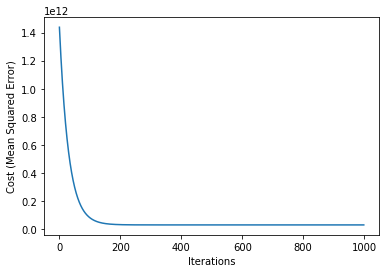

In [11]:
iterations = 1000
alpha = 10**-7 # Learning Rate

theta, J_history = LinReg(X,y,alpha,iterations)
figure = sns.lineplot(x=range(0,len(J_history)), y=J_history)
figure.set_ylabel("Cost (Mean Squared Error)")
figure.set_xlabel('Iterations')
figure;


#### $$ \theta_n = \theta_n - \alpha \frac{1}{m}\frac{dJ(\theta)}{d\theta_n} x_n$$


### Now with Sci-Kit Learn

In [12]:
# Create data
import sklearn
from sklearn.datasets import make_regression

X,y = make_regression(1000,10,noise=5, random_state=42)
df = pd.DataFrame(X)
df['y']=y

Visualize some of the data to see how it affects the target variable.

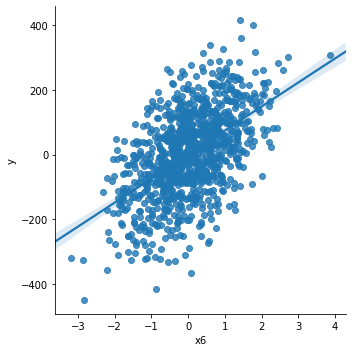

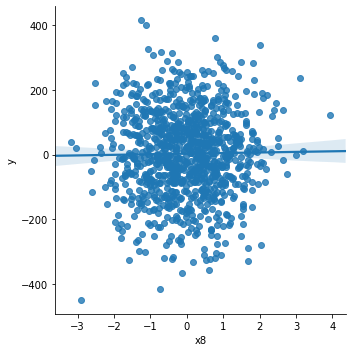

In [14]:
df['x6']=df[6]
df['x8']=df[8]

ax1 = sns.lmplot(data=df, x='x6',y='y')
ax2 = sns.lmplot(data=df, x='x8',y='y')

Fit the model

In [15]:
# Import and create model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Retrieve results
model.fit(X,y)
model.score(X,y), model.coef_[6], model.coef_[8]

(0.9986696688109149, 76.26288240886414, 4.994325527232365)

# Logistic Regression <a class="anchor" id="second-bullet"></a>

One of the most common **classsification** algorithms; based off the same mathematics as we just saw in Linear Regression - Gradient Descent.

We simply alter our hypotheses, $\theta^TX)$ to give us a probability between 0 and 1.

The Sigmoid function is given by:
\begin{equation*}
g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

Where:
* $z$ corresponds to the matrix of features multiplied by our coefficients. ($\theta^TX$)
* $g(z)$ defines our sigmoidal function - this prodcuces a probability between 0 and 1.

The value for $z$ is put into the sigmoid equation to  produce a pobability. This probability is used to give a prediction of 0 or 1. An interesting point to think about here is that Logisitc Regression is not actually a classifier - as it produces a probability. The classification is based on the threshold the user provides (more on this another time).

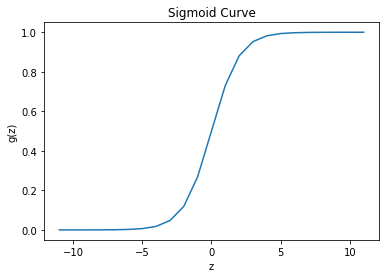

In [18]:
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

z = range(-11,12)
g=[]

for i in z:
    g.append(sigmoid(i))

sns.lineplot(x=z, y=g).set(xlabel='z', ylabel='g(z)', title='Sigmoid Curve');

### Logistic Regression Cost funciton

As logistic regression is used to solve a classification problem not a continuous one, the cost function must change. It is much simpler to use the Cross-Entropy Log-Loss function which comes with some really convenient properties. 
<br> It is most commonly defined as:

$$Cost(h_\theta(x), y)=\big\{_{-log(h_\theta(x)) \;\;\;\;\; for \: y=1}^{-log(1-h_\theta(x)) \;\; for \: y=0} $$

Which can simplified into one line:

#### $$ Cost(h_\theta(x), y)= -ylog(h_\theta(x))   -   (1-y)log(1-h_\theta(x)) $$

This is a beautiful equation because if y=1 then the right side of our equation disappears and if the opposite is true and y=0 then the left side disappears.
<br> This function also has the benefit of exponentially penalising the incorrect prediction as demonstrated below.

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


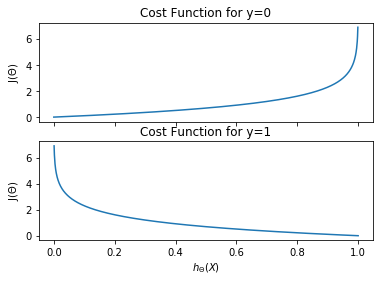

In [19]:
t = np.linspace(0,1, num=1000)
y_log = np.log(t)

f, axes = plt.subplots(nrows=2, ncols=1,sharex=True)

ax1 = sns.lineplot(x=t,y=-np.log(1-t),ax=axes[0])
ax1.set(ylabel=r'J(${\Theta}$)', title='Cost Function for y=0');
ax2 = sns.lineplot(x=t,y=-np.log(t),ax=axes[1])
ax2.set(xlabel=r'$h_{\Theta}(X)$', ylabel=r'J(${\Theta}$)', title='Cost Function for y=1');

f.get_figure()

This is what is so beautiful about this equation. Not only is each side reduced to zero depending on the true value of y, but the function also has a larger penalty, increasing exponentially, the further the predicted value strays from the true value. This means during training we will minimise the cost function faster.

### Create data to see it in action
Below we will again create some mock data but for Logistic Regression. Assume the data is scaled between 1 and 0 for simplicity.

In [16]:
df = pd.DataFrame(data=[[1,1,0,0,1],
                  [0,0,1,0.5,0],
                  [0.66,1,1,1,1],
                  [0.33,0,1,0.5,0]],
                  columns = ['Age','Chest Pain','Cough','Weight','Lung Disease'])

# Slice the data into our X and y (features and target)
y = df['Lung Disease']
X = df.drop(columns='Lung Disease')

df

,Age,Chest Pain,Cough,Weight,Lung Disease
0,1.00,1,0,0.0,1
1,0.00,0,1,0.5,0
2,0.66,1,1,1.0,1
3,0.33,0,1,0.5,0


In [17]:
def LogReg(X, y, lam, alpha, iterations):

    # Number of training examples
    m = len(y)
    
    # Initialise empty list for error term - not a necessary step but will allow us to visualize the learning later
    J_history=[]

    # Initialise our values of theta to 0 - number of coefficients determined by number of features. For simplicity assume theta_0 = 0
    theta = np.zeros(len(X))

    # Create a vector for (change in) gradient
    grad = np.zeros(len(theta));

    for i in range(0,iterations):
        while i<iterations:
        # Sigmoid function g(z)
            z = (np.dot(X,theta))
            g = (1+np.exp(-z))**-1

        # Hypothesis == g(z)
            h = g

        # Cost function for both situations where y=0 or y=1
            binary_cross_entropy = -(np.dot(y.transpose() , np.log(h))) - (np.dot((1-y.transpose()) , np.log(1-h))) + ((lam/(2*m)) * (sum((theta)**2)))

            J = (1/m) * (binary_cross_entropy).sum()
            grad = (1/m) * (np.dot(X.transpose(),(h - y))) + ((lam / m) * theta)
            theta = theta - (alpha*grad)
            J_history.append(J)
            i+=1
        else:
            break

    return theta.transpose(), J, J_history, g.transpose()
 

0.01541423349978345

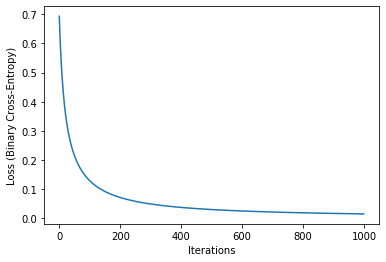

In [18]:
alpha = 0.3
iterations = 1000
    
theta, J, J_history, g = LogReg(X, y, 0, alpha, iterations)

figure = sns.lineplot(x=range(0,len(J_history)), y=J_history)
figure.set_ylabel("Loss (Binary Cross-Entropy)")
figure.set_xlabel('Iterations')
figure;
J

In [39]:
# Let's look at the coefficients and the calculated proabilities for each entry.
theta, g

(array([ 2.4694558 ,  6.35697738, -4.62777768,  0.42275576]),
 array([0.99985291, 0.01194653, 0.97770405, 0.02658337]))

In [40]:
df

,Age,Chest Pain,Cough,Weight,Lung Disease
0,1.00,1,0,0.0,1
1,0.00,0,1,0.5,0
2,0.66,1,1,1.0,1
3,0.33,0,1,0.5,0


# Summary 

From this lesson you should know:
* The type of problem to apply Linear or Logistic regression to.
* The cost functions used for each and how they work. (Cross-Entropy Log-Loss and Mean-Squared-Error)
* How gradient descent is used to minimise these cost functions and improve the models predictions.

###  Further work

Things to look at or consider:
* How to create and train models with Sci-Kit Learn or StatsModels.
* What is a threshold? Where should it be set?
* What is regularization and how can it be helpful?